In [1]:
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import mode
import pandas_profiling

base_dir = "sg_weather/"

# Data downloaded from: https://data.gov.sg/search?groups=environment
tmp1 = pd.read_csv(base_dir + "rainfall-monthly-number-of-rain-days.csv")
tmp2 = pd.read_csv(base_dir + "rainfall-monthly-highest-daily-total.csv")
tmp3 = pd.read_csv(base_dir + "rainfall-monthly-total.csv")
data = pd.merge(tmp1, tmp2, on = "month")
data = pd.merge(data, tmp3, on = 'month')

data['month'] = pd.DatetimeIndex(data['month'])

display(data)

,month,no_of_rainy_days,maximum_rainfall_in_a_day,total_rainfall
0,1982-01-01,10,36.5,107.1
1,1982-02-01,5,9.4,27.8
2,1982-03-01,11,61.7,160.8
3,1982-04-01,14,45.1,157.0
4,1982-05-01,10,33.0,102.2
...,...,...,...,...
461,2020-06-01,21,41.0,233.8
462,2020-07-01,22,30.4,140.8
463,2020-08-01,12,34.6,103.4
464,2020-09-01,18,32.8,150.2


In [2]:
#data.profile_report()

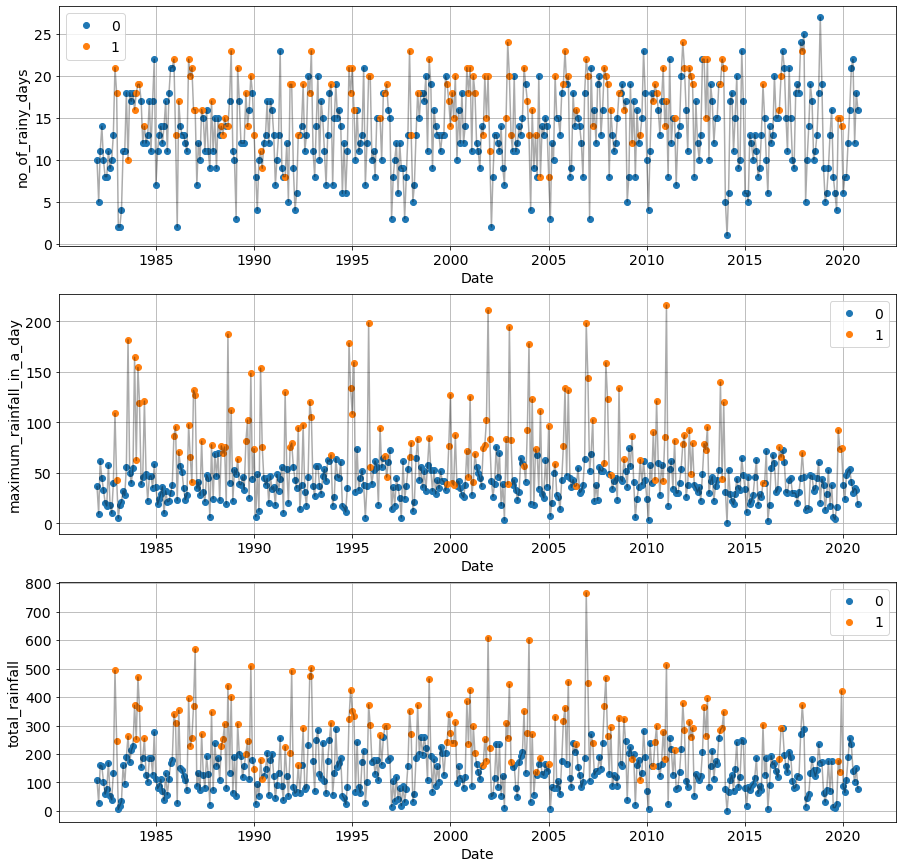

In [3]:
want = ["no_of_rainy_days", "maximum_rainfall_in_a_day", "total_rainfall"]
X = data[want].values
date = data['month']

model = hmm.GaussianHMM(n_components = 2, covariance_type = 'full')
model.fit(X)
Z = model.predict(X)

plt.figure(figsize = (15, 15))
for N in range(len(want)):
    plt.subplot(3,1,N+1)
    for z in sorted(pd.unique(Z)):
        plt.plot(date[Z==z], X[Z==z, N], 'o')
    plt.plot(date, X[:, N], 'k', alpha = 0.33)
    plt.grid(True)
    plt.legend(sorted(pd.unique(Z)), fontsize = 14)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.xlabel("Date", fontsize = 14)
    plt.ylabel(want[N], fontsize = 14)

plt.show()

In [4]:
# Due to the stochastic nature of the algorithm, one run is insufficient. We have to do multiple runs!

date_future = pd.date_range(start = "2020-11-01", end = "2021-12-01", freq = 'MS')

N = 2
n_iter = 100

Z_mean = np.zeros(len(date_future))
#X_mean = np.zeros([n_iter, len(date_future)])

for i in range(n_iter):
    model = hmm.GaussianHMM(n_components = 2, covariance_type = 'full')
    model.fit(X)
    Z_tmp, X_tmp = model.sample(len(date_future))
    Z_mean = Z_mean + Z_tmp[:, N]
    #X_mean[i, :] = X_tmp
    
Z_mean = Z_mean / n_iter
#X_mode = mode(X_mean)[0]

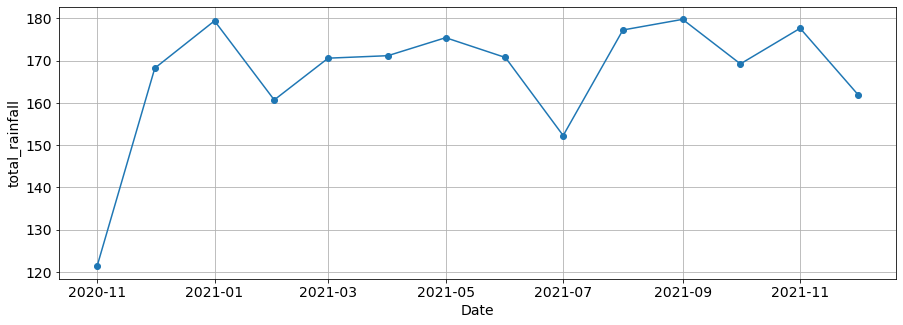

In [5]:
plt.figure(figsize = (15, 5))
plt.plot(date_future, Z_mean, '-o')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Date", fontsize = 14)
plt.ylabel(want[N], fontsize = 14)
plt.grid(True)
plt.show()